In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kospi  = pd.read_csv('../input/kospi.csv')
nasdaq = pd.read_csv('../input/nasdaq.csv')

In [3]:
kospi.head()

,Date,Close,Open,High,Low,Volume,Change
0,2003-07-29,722.33,718.42,722.47,715.01,566860000.0,0.0063
1,2003-07-30,714.15,721.66,724.23,714.07,502180000.0,-0.0113
2,2003-07-31,713.52,716.50,718.49,710.01,388890000.0,-0.0009
3,2003-08-01,727.26,718.84,728.38,718.25,457000000.0,0.0193
4,2003-08-04,718.54,719.57,724.17,717.46,439400000.0,-0.0120


# 등락률

In [4]:
# 등락률
kospi['pct_change']  = kospi['Close'].pct_change()
nasdaq['pct_change'] = nasdaq['Close'].pct_change()

In [5]:
kospi.head()

,Date,Close,Open,High,Low,Volume,Change,pct_change
0,2003-07-29,722.33,718.42,722.47,715.01,566860000.0,0.0063,NaN
1,2003-07-30,714.15,721.66,724.23,714.07,502180000.0,-0.0113,-0.011324
2,2003-07-31,713.52,716.50,718.49,710.01,388890000.0,-0.0009,-0.000882
3,2003-08-01,727.26,718.84,728.38,718.25,457000000.0,0.0193,0.019257
4,2003-08-04,718.54,719.57,724.17,717.46,439400000.0,-0.0120,-0.011990


In [6]:
# 비어있는 값을 앞의 값으로 채우기
kospi.fillna(method='ffill', inplace=True)
nasdaq.fillna(method='ffill', inplace=True)

# 비어있는 값을 뒤의 값으로 채우기
kospi.fillna(method='bfill', inplace=True)
nasdaq.fillna(method='bfill', inplace=True)

In [7]:
kospi.loc[0, 'pct_change'] = 0
nasdaq.loc[0, 'pct_change'] = 0

In [8]:
kospi.head()

,Date,Close,Open,High,Low,Volume,Change,pct_change
0,2003-07-29,722.33,718.42,722.47,715.01,566860000.0,0.0063,0.000000
1,2003-07-30,714.15,721.66,724.23,714.07,502180000.0,-0.0113,-0.011324
2,2003-07-31,713.52,716.50,718.49,710.01,388890000.0,-0.0009,-0.000882
3,2003-08-01,727.26,718.84,728.38,718.25,457000000.0,0.0193,0.019257
4,2003-08-04,718.54,719.57,724.17,717.46,439400000.0,-0.0120,-0.011990


# 보유기간 수익률

In [9]:
kospi['cumprod'] = (kospi['pct_change'] + 1).cumprod()
kospi['수익률']   = kospi['Close'] / 722.33

nasdaq['cumprod'] = (nasdaq['pct_change'] + 1).cumprod()
nasdaq['수익률']   = nasdaq['Close'] / 722.33

In [10]:
kospi # cumprod == 수익률

,Date,Close,Open,High,Low,Volume,Change,pct_change,cumprod,수익률
0,2003-07-29,722.33,718.42,722.47,715.01,566860000.0,0.0063,0.000000,1.000000,1.000000
1,2003-07-30,714.15,721.66,724.23,714.07,502180000.0,-0.0113,-0.011324,0.988676,0.988676
2,2003-07-31,713.52,716.50,718.49,710.01,388890000.0,-0.0009,-0.000882,0.987803,0.987803
3,2003-08-01,727.26,718.84,728.38,718.25,457000000.0,0.0193,0.019257,1.006825,1.006825
4,2003-08-04,718.54,719.57,724.17,717.46,439400000.0,-0.0120,-0.011990,0.994753,0.994753
...,...,...,...,...,...,...,...,...,...,...
4517,2021-11-02,3013.49,2995.58,3034.30,2995.58,525850000.0,0.0116,0.011598,4.171902,4.171902
4518,2021-11-03,2975.71,3020.36,3020.87,2969.01,658650000.0,-0.0125,-0.012537,4.119599,4.119599
4519,2021-11-04,2983.22,3000.92,3011.56,2978.07,772020000.0,0.0025,0.002524,4.129996,4.129996
4520,2021-11-05,2969.27,3003.53,3003.53,2953.96,688030000.0,-0.0047,-0.004676,4.110683,4.110683


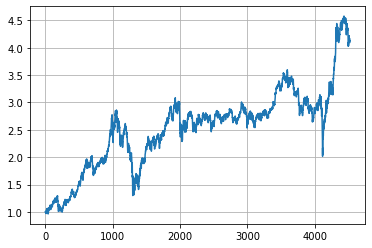

In [11]:
plt.plot(kospi.index, kospi['cumprod'], label='kospi')
plt.grid()
plt.show()

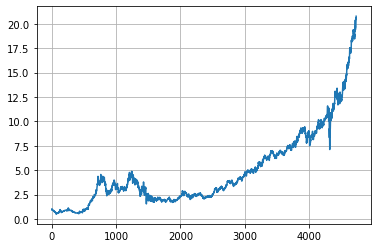

In [12]:
plt.plot(nasdaq.index, nasdaq['cumprod'], label='nasdaq')
plt.grid()
plt.show()

# 상관관계

In [13]:
check_corr = pd.DataFrame({'kospi':kospi['Close'], 'nasdaq':nasdaq['Close']})
check_corr.dropna(inplace=True)

In [14]:
check_corr

,kospi,nasdaq
0,722.33,10.25
1,714.15,10.25
2,713.52,10.40
3,727.26,10.30
4,718.54,10.20
...,...,...
4517,3013.49,128.85
4518,2975.71,129.14
4519,2983.22,130.14
4520,2969.27,132.74


In [15]:
# 두 시장의 상관계수
check_corr.corr()

,kospi,nasdaq
kospi,1.000000,0.774418
nasdaq,0.774418,1.000000


<AxesSubplot:xlabel='kospi', ylabel='nasdaq'>

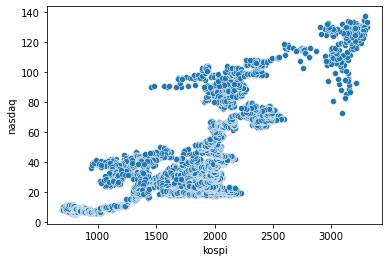

In [16]:
sns.scatterplot(data=check_corr, x='kospi', y='nasdaq')

<AxesSubplot:xlabel='kospi', ylabel='nasdaq'>

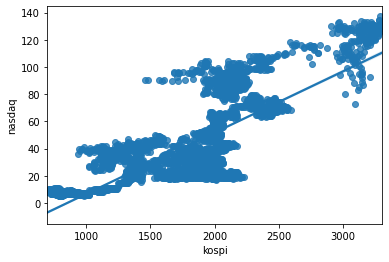

In [17]:
sns.regplot(data=check_corr, x='kospi', y='nasdaq')

# 캔들 차트 그리기

In [18]:
import FinanceDataReader as fdr

samsung = fdr.DataReader('005930', '2021-01-01', '2021-11-01')
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170
...,...,...,...,...,...,...
2021-10-26,70600,71500,70400,71100,10528252,0.012821
2021-10-27,71000,71000,70000,70100,10295316,-0.014065
2021-10-28,69500,72200,69500,70700,20644902,0.008559


In [19]:
# pip install bokeh 필요
config = {
    'title':'fdr.chart.config()를 사용하여 설정을 한번에 지정할 수 있습니다', 
    'width': 600, 'height': 300, 'volume': True,
}
fdr.chart.config(config=config)
fdr.chart.plot(samsung, title='삼성전자')

Loading BokehJS ...

In [21]:
import pandas_datareader as pdr

samsung = pdr.get_data_yahoo('005930.KS', '2020-01-01', '2021-11-01')
samsung

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0,52058.132812
2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0,52341.054688
2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0,52341.054688
2020-01-07,56400.0,55600.0,55700.0,55800.0,10009778.0,52623.980469
2020-01-08,57400.0,55900.0,56200.0,56800.0,23501171.0,53567.058594
...,...,...,...,...,...,...
2021-10-26,71500.0,70400.0,70600.0,71100.0,10528252.0,71100.000000
2021-10-27,71000.0,70000.0,71000.0,70100.0,10295316.0,70100.000000
2021-10-28,72200.0,69500.0,69500.0,70700.0,20644902.0,70700.000000


# 연간 보유기간 수익률(기하평균)

In [22]:
# 연간 보유기간수익률(%) = {[(최종투자자산 ÷ 최초투자자산)^1/n] - 1} X 100
# n : 년수 (ex 2년 6개월이라면 n=2.5 )
n = 1
start = samsung.loc['2020-01-02', 'Close']
end   = samsung.loc['2021-11-01', 'Close']
(pow((end / start), 1/n) - 1) * 100

26.630434782608692

# 변동계수

In [23]:
# 위험측정수단, 평균 한 단위 당 어느 정도의 표준편차가 생기는지
# 자산수익률의 표준편차 / 자산의 평균(기대)수익률

samsung['pct_change + 1'] = samsung['Close'].pct_change() + 1
samsung

,High,Low,Open,Close,Volume,Adj Close,pct_change + 1
Date,,,,,,,
2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0,52058.132812,NaN
2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0,52341.054688,1.005435
2020-01-06,55600.0,54600.0,54900.0,55500.0,10278951.0,52341.054688,1.000000
2020-01-07,56400.0,55600.0,55700.0,55800.0,10009778.0,52623.980469,1.005405
2020-01-08,57400.0,55900.0,56200.0,56800.0,23501171.0,53567.058594,1.017921
...,...,...,...,...,...,...,...
2021-10-26,71500.0,70400.0,70600.0,71100.0,10528252.0,71100.000000,1.012821
2021-10-27,71000.0,70000.0,71000.0,70100.0,10295316.0,70100.000000,0.985935
2021-10-28,72200.0,69500.0,69500.0,70700.0,20644902.0,70700.000000,1.008559


In [24]:
samsung['pct_change + 1'].std() / samsung['pct_change + 1'].mean()

0.018051032302832955

# 샤프지수

In [25]:
# 변동성 한 단위당 얼마만큼의 초과수익을 얻을 수 있는지
# 초과수익률 / 변동성

# risk & return

In [26]:
samsung = pdr.get_data_yahoo('005930.KS', '2015-01-01', '2021-11-01')
naver   = pdr.get_data_yahoo('035420.KS', '2015-01-01', '2021-11-01')
kakao   = pdr.get_data_yahoo('035720.KS', '2015-01-01', '2021-11-01')
nc      = pdr.get_data_yahoo('036570.KS', '2015-01-01', '2021-11-01')

df = pd.DataFrame({
    'samsung': samsung['Close'], 
    'naver': naver['Close'],
    'kakao': kakao['Close'],
    'nc': nc['Close'],
})
df.reset_index(drop=True, inplace=True)
df

,samsung,naver,kakao,nc
0,26600.0,146200.0,27440.0,180500.0
1,26660.0,149800.0,28900.0,193500.0
2,25900.0,148600.0,29060.0,194000.0
3,26140.0,146400.0,29640.0,190000.0
4,26280.0,148800.0,29460.0,191000.0
...,...,...,...,...
1669,71100.0,412500.0,127500.0,627000.0
1670,70100.0,414500.0,128500.0,639000.0
1671,70700.0,413000.0,125500.0,621000.0
1672,69800.0,407000.0,125500.0,627000.0


In [27]:
daily_return = df.pct_change()
daily_return # 종목별 일별 변동률

,samsung,naver,kakao,nc
0,NaN,NaN,NaN,NaN
1,0.002256,0.024624,0.053207,0.072022
2,-0.028507,-0.008011,0.005536,0.002584
3,0.009266,-0.014805,0.019959,-0.020619
4,0.005356,0.016393,-0.006073,0.005263
...,...,...,...,...
1669,0.012821,0.024845,0.011905,0.008039
1670,-0.014065,0.004848,0.007843,0.019139
1671,0.008559,-0.003619,-0.023346,-0.028169
1672,-0.012730,-0.014528,0.000000,0.009662


In [28]:
annual_return = daily_return.mean() * 252
annual_return # 일별 변동률을 연으로 환산

samsung    0.180472
naver      0.210583
kakao      0.295452
nc         0.268739
dtype: float64

In [29]:
daily_cov = daily_return.cov()
daily_cov # 공분산

,samsung,naver,kakao,nc
samsung,0.000278,0.000091,0.000078,0.000082
naver,0.000091,0.000444,0.000199,0.000149
kakao,0.000078,0.000199,0.000531,0.000177
nc,0.000082,0.000149,0.000177,0.000607


In [30]:
annual_cov = daily_cov * 252
annual_cov # 연환산 공분산

,samsung,naver,kakao,nc
samsung,0.069972,0.022841,0.019644,0.020653
naver,0.022841,0.111996,0.050045,0.037655
kakao,0.019644,0.050045,0.133822,0.044664
nc,0.020653,0.037655,0.044664,0.152966


# 포트폴리오 구성

In [31]:
portfolio_return  = [] # 포트폴리오 수익률
portfolio_risk    = [] # 포트폴리오 위험
portfolio_weights = [] # 포트폴리오 비중

for _ in range(20000): # 원래는 row를 넣어야 하는데 밀도 때문에 20000
    
    weights = np.random.random(df.shape[1]) # 자산 수 만큼의 난수 생성
    weights /= np.sum(weights)    # 생선된 난수를 합하여 비중으로 변환 
    
    # 기대수익률 : 비중 * 연수익률
    # v = [1, 2, 3], w = [4, 5, 6]
    # np.dot(v, w) = 1*4 + 2*5 + 3*6
    returns = np.dot(weights, annual_return)
    
    # 위험 : (비중 * (공분산 * 비중))의 제곱근 == 기대 표준편차(?)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    
    portfolio_return.append(returns)
    portfolio_risk.append(risk)
    portfolio_weights.append(weights)

In [ ]:
[0.1, 0.3, 0.5, 0.5]

In [32]:
portfolio_return

[0.25135723434579044,
 0.24252169133981252,
 0.25192537063976705,
 0.2821801074415774,
 0.26224348892391697,
 0.2401329419218678,
 0.21933301463564464,
 0.2393596873352481,
 0.23378105925910472,
 0.25196758306454237,
 0.25269465649790557,
 0.24720544141541534,
 0.22265949809992086,
 0.23593590401975492,
 0.23383340301782143,
 0.2293586140221977,
 0.2312319810103522,
 0.24155278758005366,
 0.22314703760855892,
 0.2460188561469801,
 0.2350217236271287,
 0.2259424873630521,
 0.26019564445808263,
 0.2414968197504949,
 0.2547064272806932,
 0.2476800929249947,
 0.23482176524996407,
 0.24284740050637185,
 0.22823082006346612,
 0.22992306014166441,
 0.22423375821634267,
 0.25311397525220725,
 0.233323103541775,
 0.2507505653218397,
 0.2371485612002072,
 0.22361138191558583,
 0.225294752703422,
 0.2216310993659993,
 0.22875372520105575,
 0.2414168544465422,
 0.24893126087772616,
 0.24769872013016572,
 0.23878533189418868,
 0.24162279547157267,
 0.2365267250989609,
 0.25037015638953986,
 0.24677

In [33]:
# 일 단위 수익률, 위험, 종목별 비중
portfolio_dict = {'returns': portfolio_return, 'risk': portfolio_risk}
for i, stock in enumerate(df.columns):
    # 종목마다 일별 비중
    portfolio_dict[stock] = [weight[i] for weight in portfolio_weights]

portfolio_df = pd.DataFrame(portfolio_dict)
portfolio_df

,returns,risk,samsung,naver,kakao,nc
0,0.251357,0.317359,0.193785,0.017548,0.027829,0.760838
1,0.242522,0.250663,0.108528,0.394385,0.235765,0.261322
2,0.251925,0.243406,0.244003,0.104647,0.404656,0.246694
3,0.282180,0.301301,0.027893,0.026792,0.653654,0.291661
4,0.262243,0.268922,0.130753,0.073049,0.347910,0.448288
...,...,...,...,...,...,...
19995,0.218640,0.219280,0.402631,0.312198,0.134649,0.150522
19996,0.235024,0.247632,0.176554,0.357256,0.099041,0.367150
19997,0.246678,0.237166,0.343480,0.024125,0.361616,0.270780
19998,0.239538,0.234714,0.245214,0.228714,0.215049,0.311023


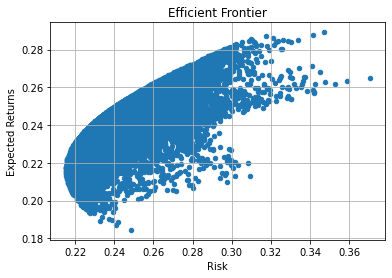

In [34]:
portfolio_df.plot.scatter(x='risk', y='returns')
plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.grid()
plt.show()